In [1]:
import os, cv2, argparse
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from PIL import Image
from matplotlib.image import imread
from matplotlib import pyplot
from sklearn import tree
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from numpy.random import RandomState
np.random.seed(123)  # for reproducibility
import sys
import random

from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

from sklearn.model_selection import cross_val_score

import keras
from keras.models import load_model
from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Activation
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import numpy as np
import gym
import random
from collections import deque
import tensorflow as tf
import os

Using TensorFlow backend.


In [2]:
def shuffle_data(arr1, arr2):
    seed = random.randint(0, 1000)
    ran = RandomState(seed)
    ran.shuffle(arr1)
    ran = RandomState(seed)
    ran.shuffle(arr2)

In [3]:
EPOCHS = 2
TRAIN_DIR = './LunarLanderFramesPart1/'
TRAIN_IMG, TRAIN_CLS, TEST_IMG, TEST_CLS = ([] for i in range(4))

In [4]:
train_dir = TRAIN_DIR
## loading the images
for file in os.listdir(train_dir):
    if not file.endswith('jpeg'):
        print("empty file")
        continue
    img = cv2.imread(train_dir + file)
    mylen = len(file) - 6
    substr = file[mylen:mylen+1]
    
    # Resizing loaded images
    res=cv2.resize(img,(250,250))
    
    #converting images into grayscale
    gray_image = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    xarr=np.squeeze(np.array(gray_image).astype(np.float32))
    
    #fomarting and converrting image 2D fomart for that can be used in the Supervised Learning Method
    m,v=cv2.PCACompute(xarr, mean=None)
    arr= np.array(v)
    flat_arr= arr.ravel()
    TRAIN_IMG.append(flat_arr)
    TRAIN_CLS.append(int(substr))

empty file


In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    TRAIN_IMG, TRAIN_CLS, test_size=0.3,random_state=109)

In [6]:
New_tree = tree.DecisionTreeClassifier(criterion="entropy")
New_tree.fit(X_train,y_train)
y_pred_tree = New_tree.predict(X_test)

In [7]:
accuracy_tree = metrics.accuracy_score(y_test, y_pred_tree)
#model_valid_accuracy_comparisons["Better Tree"] = accuracy_tree
print("Tree Accuracy: " +  str(accuracy_tree))
print(metrics.classification_report(y_test, y_pred_tree))
print("Confusion Matrix")
display(pd.crosstab(np.array(y_test), y_pred_tree, rownames=['True'], colnames=['Predicted'], margins=True))

Tree Accuracy: 0.5569035239745812
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1640
           1       0.10      0.10      0.10       105
           2       0.58      0.58      0.58      1610
           3       0.04      0.05      0.04       107

   micro avg       0.56      0.56      0.56      3462
   macro avg       0.33      0.33      0.33      3462
weighted avg       0.56      0.56      0.56      3462

Confusion Matrix


Predicted,0,1,2,3,All
True,,,,,
0,981,44,570,45,1640
1,43,11,51,0,105
2,556,49,931,74,1610
3,43,4,55,5,107
All,1623,108,1607,124,3462


In [ ]:
### creating the DeepQLearning

Build a new model
-----------------------------------
Environment Observation_space:  Box(8,)
Environment Action_space:  Discrete(4)
-----------------------------------

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  0
Time:  0.22 secs
Reward: -142.35221886827998
Maximum Reward: -142.35221886827998  on Episode: 0
Times win: 0
Mean reward of the past 100 episodes:  -142.35221886827998
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  1
Time:  0.05 secs
Reward: -198.37969687924374
Maximum Reward: -142.35221886827998  on Episode: 0
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  2
Time:  0.04 secs
Reward: -384.5374360248921
Maximum Reward: -142.35221886827998  on Episode: 0
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  3
Time:  0.04 secs
Reward: -347.92718986925837
Maximum Reward: -142.35221886827998  on Episode: 0
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Epi

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  45
Time:  0.16 secs
Reward: -87.54641751254404
Maximum Reward: 8.893531583000836  on Episode: 17
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  46
Time:  0.08 secs
Reward: -54.71689245341401
Maximum Reward: 8.893531583000836  on Episode: 17
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  47
Time:  0.07 secs
Reward: -93.31625591142037
Maximum Reward: 8.893531583000836  on Episode: 17
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  48
Time:  0.09 secs
Reward: -50.89069959340701
Maximum Reward: 8.893531583000836  on Episode: 17
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  49
Time:  0.06 secs
Reward: -227.98756964508738
Maximum Reward: 8.893531583000836  on Episode: 17
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  50
Time:  0.17 secs
Reward: -103.55575785099823

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  92
Time:  0.21 secs
Reward: -303.1532822248547
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  93
Time:  0.06 secs
Reward: -117.82694536698274
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  94
Time:  0.28 secs
Reward: -110.06100528072766
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  95
Time:  0.25 secs
Reward: -224.4033318662677
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  96
Time:  0.13 secs
Reward: -96.35710332885861
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  97
Time:  0.09 secs
Reward: -70.30803756108975
Maxi

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  139
Time:  0.09 secs
Reward: -73.11502538025162
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  140
Time:  0.08 secs
Reward: -30.341044180949865
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  141
Time:  0.09 secs
Reward: -42.87319828854446
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  142
Time:  0.12 secs
Reward: -107.90184018607714
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  143
Time:  0.14 secs
Reward: -324.4076713811429
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  144
Time:  0.07 secs
Reward: -307.925840131558

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  186
Time:  0.15 secs
Reward: -155.9737633682396
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  187
Time:  0.05 secs
Reward: -304.9564191805607
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  188
Time:  0.08 secs
Reward: -308.4064577425905
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  189
Time:  0.05 secs
Reward: -364.58751951782153
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  190
Time:  0.09 secs
Reward: -231.91983803673156
Maximum Reward: 60.4993811729415  on Episode: 71
Times win: 0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Episode:  191
Time:  0.13 secs
Reward: -319.889285025822

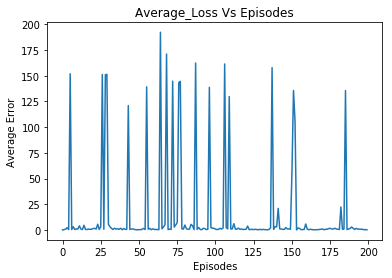

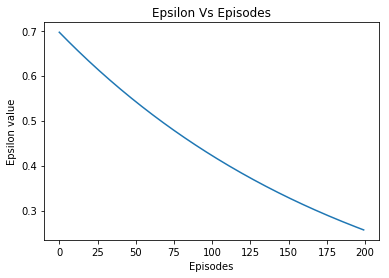

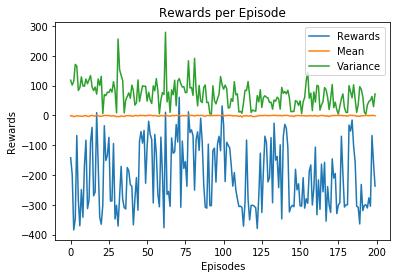

In [6]:

os.environ['KMP_DUPLICATE_LIB_OK']='True'
class AGENT:
    def __init__(self, nx, ny, lr, gamma, s_link):
        self.nx = nx  #  Observation array length   nx = env.observation_space.shape[0]
        self.ny = ny  #   Action space length       ny = env.action_space.n
        self.gamma = gamma
        self.lr = lr
        #self.l_link =l_link 
        self.s_link =s_link 
        self.deck = deque(maxlen=2000)
        self.e = 0.7
        self.e_= 0.01
        self.dc= 0.995
        self.los = []
        
        
        if os.path.isfile('./' + self.s_link):
            print("LOAD existing keras model....")
            self.model = load_model(self.s_link)
            print(self.model.summary())
        else:
            # Call function model to build the model   
            print("Build a new model")
            self.model = self.MODEL()      
        
        self.ep_obs, self.ep_rewards, self.ep_action, self.ep_obs_new, self.ep_flags = [], [], [], [], []
        
            
    def choose_action(self,observation):
        if np.random.rand() <= self.e : 
            action = np.random.choice(len(range(4)))
            return action
            
        probs = self.model.predict(observation)    
        action = np.argmax(probs[0])
        return action
                
    
    def storing(self, observation, action, reward, observation_new, flags ):
        self.deck.append((observation, action, reward, observation_new, flags ))
        self.ep_obs.append(observation)
        self.ep_action.append(action)
        self.ep_rewards.append(reward)
        self.ep_obs_new.append(observation_new)
        self.ep_flags.append(flag)
        

    def save(self,name):
        self.model.save(name)

    def MODEL(self):                     
        # Build Network
        model = Sequential()
        model.add(Dense(128, input_dim=nx, activation='relu'))
        model.add(Dense(128,  activation='relu'))
        model.add(Dense(self.ny, activation='linear'))
        model.compile(loss='mse',optimizer=Adam(lr=self.lr))                 
        return model
    
    
    def TRAIN(self, batch):
        sample_indx = random.sample(self.deck, batch)
        self.los = []
        
        for observation, act, reward, obs_new, done in sample_indx:            
            target = reward
            if not done: 
                target = ( (1.0-0.1)*reward + 0.1 * (self.gamma*np.amax(self.model.predict(obs_new)[0])))                
            
            target_old = self.model.predict(observation)
            target_old[0][act] = target
            
            history = self.model.fit(x=observation, y=target_old,\
                                #batch_size=1,\
                                verbose=0,\
                                epochs=1)
            self.los.append(history.history['loss'])        
            self.ep_obs, self.ep_rewards, self.ep_action, self.ep_obs_new, self.ep_flags = [], [], [], [], []
        
        mm = np.mean(self.los)                
        if self.e >= self.e_:
            self.e *= self.dc
        #self.save(self.s_link)
        return history, mm

if __name__ == '__main__':
    
    BATCH = 16
    s_link = "lunar-lander_solved.h5"
    
    RENDER_REWARD_MIN = 5000
    RENDER_ENV = False
#    if rendering == 'y': RENDER_ENV = True  #flag for rendering the environment
    EPISODES = 200    # Number of episodes
    
    env = gym.make('LunarLander-v2')
    env = env.unwrapped
    
    # Observation and Action array length
    nx = env.observation_space.shape[0] 
    ny = env.action_space.n
    lr = 0.002
    gamma = 0.98
    agent = AGENT(nx,ny, lr, gamma, s_link)
    
    rewards_over_time = []
    error = []
    epsilon = []
    rew_var = []
    rew_mean = []
    mean_100 = []
    seed = np.random.seed(1000)
         
    print("-----------------------------------")        
    print("Environment Observation_space: ", env.observation_space)
    print("Environment Action_space: ", env.action_space) 
    print("-----------------------------------\n")
    w = 0
        
    # Start running the episodes        
    for i in range(EPISODES): 
        observation = env.reset()         
        observation = observation.reshape(1,-1)                
        start = time.time()
        
        while True:            
            if RENDER_ENV==True:
                env.render()
            
            action = agent.choose_action(observation)
            observation_new, reward, flag, inf = env.step(action)
            observation_new = observation_new.reshape(1,-1)                    
            
            agent.storing(observation, action, reward, observation_new, flag)   
            observation = observation_new         
            
            end = time.time()
            time_space = end - start
            
            if time_space > 15:
                flag = True
          
            # Sum the episode rewards
            ep_rew_total = sum(agent.ep_rewards)
            mean = np.mean(agent.ep_rewards)
            var = np.var(agent.ep_rewards)
            if ep_rew_total < -300:
                flag = True
            
            if flag==True:
                rewards_over_time.append(ep_rew_total)
                rew_mean.append(mean)
                rew_var.append(var)
                max_reward = np.max(rewards_over_time)
                episode_max = np.argmax(rewards_over_time)
                if ep_rew_total >=200 :
                    w = w + 1
                    agent.save(s_link)
                                        
                print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
                print("Episode: ", i)
                print("Time: ", np.round(time_space, 2),"secs")
                print("Reward:", ep_rew_total)
                print("Maximum Reward: " + str(max_reward) + "  on Episode: " + str(episode_max))
                print("Times win: " + str(w))
                
                if i % 100 ==0:
                    print("Mean reward of the past 100 episodes: ", str(np.mean(rewards_over_time[-100:])))
                    mean_100.append(np.mean(rewards_over_time[-100:]))
                
                # Start training the Neural Network
                hist, mm= agent.TRAIN(BATCH)
                
                epsilon.append(agent.e)
                                           
                error.append(mm)
                
                if max_reward > RENDER_REWARD_MIN: RENDER_ENV = True
                
                break
            
    plt.figure(1)
    plt.plot(error)
    plt.xlabel("Episodes")
    plt.ylabel("Average Error")
    plt.title("Average_Loss Vs Episodes")
    plt.show()
    
    plt.figure(1)
    plt.plot(epsilon)
    plt.xlabel("Episodes")
    plt.ylabel("Epsilon value")
    plt.title("Epsilon Vs Episodes")
    plt.show()
    
    np.save("rewards_over_time", rewards_over_time)
    np.save("mean100", mean_100)            
            
            
    plt.figure(1)            
    plt.plot(rewards_over_time, label="Rewards")
    plt.plot(rew_mean, label="Mean")
    plt.plot(rew_var, label="Variance")    
    plt.xlabel("Episodes")
    plt.ylabel("Rewards")
    plt.title("Rewards per Episode")
    plt.legend(loc=0)
    plt.show()

In [ ]:
#save Learning model to be loaded in the Lunar Lander Player.
New_tree.model.save("player_images_2.mod")

In [ ]:
## Comments:
### The Training of the supervised learning method took a long time to complete the training. The performance of the 
### supervised learning method appeared to be very low using the Decision Tree approach.
## The value of the epsilon value decreases with respect to increase in the Episodes. The losses in the training process
### reached the 60th episode. The time taken for the 200 episodes to complete is is comparably lower than that of the
## the training in the supervised learning. the maximum reward was obtained at episode 71 as shown in the training logs